In [1]:
!pip install geopandas
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 531.7 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [3]:
#calculating trump vote ratio
vote_df = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/2020 Election Voting by County csv.csv')
vote_df=vote_df[~vote_df['state'].isin(['alaska','hawaii'])]
vote_df.head()

fips      name  votes  absentee_votes  reporting  precincts  \
40  48001  Anderson  19227           14491         23         23   
41  48003   Andrews   5863            4780          5          5   
42  48005  Angelina  34574           28635         43         43   
43  48007   Aransas  12290           11029          6          6   
44  48009    Archer   4796            3623         12         12   

                                      absentee_method   eevp  tot_exp_vote  \
40  Released as a precinct as first report of the ...  100.0       19227.0   
41  Released as a precinct as first report of the ...  100.0        5863.0   
42  Released as a precinct as first report of the ...  100.0       34574.0   
43  Released as a precinct as first report of the ...  100.0       12290.0   
44  Released as a precinct as first report of the ...  100.0        4796.0   

   eevp_value  ... results_charlesm results_mchughj  results_jacob_fambrop  \
40       100%  ...              NaN             NaN                    NaN   
41       100%  ...              NaN             NaN                    NaN   
42       100%  ...              NaN             NaN                    NaN   
43       100%  ...              NaN             NaN                    NaN   
44       100%  ...              NaN             NaN                    NaN   

   results_scottj  results_kishorej  results_absentee_charlesm  \
40            NaN               NaN                        NaN   
41            NaN               NaN                        NaN   
42            NaN               NaN                        NaN   
43            NaN               NaN                        NaN   
44            NaN               NaN                        NaN   

    results_absentee_mchughj  results_absentee_jacob_fambrop  \
40                       NaN                             NaN   
41                       NaN                             NaN   
42                       NaN                             NaN   
43                       NaN                             NaN   
44                       NaN                             NaN   

    results_absentee_scottj  results_absentee_kishorej  
40                      NaN                        NaN  
41                      NaN                        NaN  
42                      NaN                        NaN  
43                      NaN                        NaN  
44                      NaN                        NaN  

[5 rows x 107 columns]

In [4]:
vote_df['trump_vote_ratio'] = vote_df['results_trumpd']/vote_df['votes']
vote_df.head()

fips      name  votes  absentee_votes  reporting  precincts  \
40  48001  Anderson  19227           14491         23         23   
41  48003   Andrews   5863            4780          5          5   
42  48005  Angelina  34574           28635         43         43   
43  48007   Aransas  12290           11029          6          6   
44  48009    Archer   4796            3623         12         12   

                                      absentee_method   eevp  tot_exp_vote  \
40  Released as a precinct as first report of the ...  100.0       19227.0   
41  Released as a precinct as first report of the ...  100.0        5863.0   
42  Released as a precinct as first report of the ...  100.0       34574.0   
43  Released as a precinct as first report of the ...  100.0       12290.0   
44  Released as a precinct as first report of the ...  100.0        4796.0   

   eevp_value  ... results_mchughj results_jacob_fambrop  results_scottj  \
40       100%  ...             NaN                   NaN             NaN   
41       100%  ...             NaN                   NaN             NaN   
42       100%  ...             NaN                   NaN             NaN   
43       100%  ...             NaN                   NaN             NaN   
44       100%  ...             NaN                   NaN             NaN   

   results_kishorej  results_absentee_charlesm  results_absentee_mchughj  \
40              NaN                        NaN                       NaN   
41              NaN                        NaN                       NaN   
42              NaN                        NaN                       NaN   
43              NaN                        NaN                       NaN   
44              NaN                        NaN                       NaN   

    results_absentee_jacob_fambrop  results_absentee_scottj  \
40                             NaN                      NaN   
41                             NaN                      NaN   
42                             NaN                      NaN   
43                             NaN                      NaN   
44                             NaN                      NaN   

    results_absentee_kishorej  trump_vote_ratio  
40                        NaN          0.785874  
41                        NaN          0.843084  
42                        NaN          0.725285  
43                        NaN          0.751749  
44                        NaN          0.896580  

[5 rows x 108 columns]

In [5]:
vote_summary_df = vote_df[['fips','name','trump_vote_ratio']]
vote_summary_df.head()

fips      name  trump_vote_ratio
40  48001  Anderson          0.785874
41  48003   Andrews          0.843084
42  48005  Angelina          0.725285
43  48007   Aransas          0.751749
44  48009    Archer          0.896580

Category distribution based on vote ratio

In [6]:
a1,a2,a3,a4,a5=[],[],[],[],[]

for _,row in vote_summary_df.iterrows():
  fips=row['fips']
  vote_ratio=row['trump_vote_ratio']
  if vote_ratio<=0.25:
    a1.append(fips)
  elif 0.25<vote_ratio<0.45:
    a2.append(fips)
  elif 0.45<vote_ratio<0.55:
    a3.append(fips)
  elif 0.55<=vote_ratio<0.75:
    a4.append(fips)
  else:
    a5.append(fips)

print(len(a1),len(a2),len(a3),len(a4),len(a5))
print(len(a1)+len(a2)+len(a3)+len(a4)+len(a5))

62 355 330 1385 983
3115


In [7]:
print("a1",a1)
print("a2",a2)
print("a3",a3)
print("a4",a4)
print("a5",a5)

a1 [51510, 51013, 51540, 51610, 51730, 51760, 55025, 55078, 22071, 28021, 28051, 28063, 28103, 29510, 37063, 37135, 6001, 6041, 6075, 6081, 6087, 6097, 53033, 53055, 17031, 38085, 24510, 24031, 24033, 13063, 13089, 36005, 36047, 36061, 36109, 45005, 46102, 46121, 50007, 50025, 42101, 41051, 1011, 1063, 1087, 34013, 25007, 25025, 35049, 35055, 8013, 8031, 8097, 8113, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008]
a2 [48029, 48047, 48061, 48113, 48127, 48141, 48157, 48201, 48209, 48215, 48247, 48323, 48377, 48453, 48479, 48489, 48507, 27031, 27037, 27053, 27109, 27123, 27137, 27163, 26049, 26065, 26077, 26103, 26125, 26161, 26163, 51003, 51025, 51036, 51590, 51595, 51059, 51600, 51620, 51630, 51081, 51650, 51660, 51087, 51670, 51678, 51107, 51683, 51685, 51690, 51700, 51710, 51131, 51740, 51153, 51750, 51770, 51790, 51800, 51183, 51830, 51840, 55003, 55007, 55031, 55035, 55049, 55063, 55079, 55105, 21067, 21111, 22033, 22035, 22065, 22091, 22095, 28001, 28011, 28025, 28027, 2804

In [8]:
import pandas as pd

# Initialize lists for each category
a1c, a2c, a3c, a4c, a5c= [], [], [], [], []

# Iterate through the DataFrame and categorize FIPS codes
for _, row in vote_summary_df.iterrows():
    fips = row['fips']
    vote_ratio = row['trump_vote_ratio']
    name = row['name']
    if vote_ratio <= 0.25:
        a1c.append((fips, name))
    elif 0.25 < vote_ratio < 0.45:
        a2c.append((fips, name))
    elif 0.45 < vote_ratio < 0.55:
        a3c.append((fips, name))
    elif 0.55 <= vote_ratio < 0.75:
        a4c.append((fips, name))
    else:
        a5c.append((fips, name))

# Combine all FIPS codes with their respective categories and names
data = []
for fips, name in a1c:
    data.append({'fips': fips, 'name': name, 'category': 'a1'})
for fips, name in a2c:
    data.append({'fips': fips, 'name': name, 'category': 'a2'})
for fips, name in a3c:
    data.append({'fips': fips, 'name': name, 'category': 'a3'})
for fips, name in a4c:
    data.append({'fips': fips, 'name': name, 'category': 'a4'})
for fips, name in a5c:
    data.append({'fips': fips, 'name': name, 'category': 'a5'})

# Convert to DataFrame
cat_df = pd.DataFrame(data)

# Save DataFrame to CSV
cat_df.to_csv('fips_categories.csv', index=False)




Cases and Deaths datewise

In [9]:
qdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/us-counties-2021.csv')

qdf['date'] = pd.to_datetime(qdf['date'], errors='coerce')

qdf = qdf.dropna(subset=['date'])

start_date = '2021-03-01'
end_date = '2021-09-01'

date_filtered_data = qdf[(qdf['date'] >= start_date) & (qdf['date'] <= end_date)]

In [10]:
qdf.head()

date   county    state    fips  cases  deaths
0 2021-01-01  Autauga  Alabama  1001.0   4239    50.0
1 2021-01-01  Baldwin  Alabama  1003.0  13823   169.0
2 2021-01-01  Barbour  Alabama  1005.0   1517    33.0
3 2021-01-01     Bibb  Alabama  1007.0   1854    46.0
4 2021-01-01   Blount  Alabama  1009.0   4693    63.0

In [11]:
qdf[qdf['fips']==1001].head()

date   county    state    fips  cases  deaths
0     2021-01-01  Autauga  Alabama  1001.0   4239    50.0
3245  2021-01-02  Autauga  Alabama  1001.0   4268    50.0
6492  2021-01-03  Autauga  Alabama  1001.0   4305    50.0
9738  2021-01-04  Autauga  Alabama  1001.0   4336    50.0
12984 2021-01-05  Autauga  Alabama  1001.0   4546    50.0

Vaccinations Data

In [12]:
df = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/combined.csv')
df = df[~df['FIPS'].isin(['UNK'])]
df['FIPS'] = pd.to_numeric(df['FIPS'])
df = df.rename(columns={'FIPS': 'fips'})
df['date'] = pd.to_datetime(df['Date'])

# Sort by 'fips' and 'date' to ensure the latest date is last
df = df.sort_values(by=['fips', 'date'])

# Drop duplicate 'fips', keeping only the last occurrence (which will be the latest date due to sorting)
df_last = df.drop_duplicates(subset=['fips'], keep='last')

# Select only the 'fips' and 'Series_Complete_Yes' columns
df_result = df_last[['fips', 'Series_Complete_Yes']]
df_grouped = df_result.rename(columns={'Series_Complete_Yes': 'vaccinations'})


print(df_grouped)

         fips  vaccinations
212816   1001       13470.0
212817   1003       64146.0
212818   1005        5673.0
212819   1007        4232.0
212820   1009       10438.0
...       ...           ...
215199  72145       21379.0
215200  72147        4599.0
215201  72149       13465.0
215202  72151       11363.0
215203  72153       15443.0

[3221 rows x 2 columns]


In [13]:
def create_category_df(fips_list):
    return date_filtered_data[date_filtered_data['fips'].isin(fips_list)][['fips','date', 'county', 'state', 'cases', 'deaths']].reset_index(drop=True)

# Create dataframes for each category
a1_df = create_category_df(a1)
a2_df = create_category_df(a2)
a3_df = create_category_df(a3)
a4_df = create_category_df(a4)
a5_df = create_category_df(a5)

# Print the first few rows of each dataframe to verify
print("a1_df:")
print(a1_df.head())
print("a2_df:")
print(a2_df.head())
print("a3_df:")
print(a3_df.head())
print("a4_df:")
print(a4_df.head())
print("a5_df:")
print(a5_df.head())

a1_df:
     fips       date   county       state  cases  deaths
0  1011.0 2021-03-01  Bullock     Alabama   1169    36.0
1  1063.0 2021-03-01   Greene     Alabama    882    32.0
2  1087.0 2021-03-01    Macon     Alabama   1420    43.0
3  6001.0 2021-03-01  Alameda  California  80798  1242.0
4  6041.0 2021-03-01    Marin  California  13152   197.0
a2_df:
     fips       date      county    state  cases  deaths
0  1047.0 2021-03-01      Dallas  Alabama   3403   141.0
1  1065.0 2021-03-01        Hale  Alabama   2105    68.0
2  1073.0 2021-03-01   Jefferson  Alabama  71073  1374.0
3  1085.0 2021-03-01     Lowndes  Alabama   1311    51.0
4  1101.0 2021-03-01  Montgomery  Alabama  22586   500.0
a3_df:
     fips       date   county    state  cases  deaths
0  1005.0 2021-03-01  Barbour  Alabama   2116    51.0
1  1035.0 2021-03-01  Conecuh  Alabama   1067    24.0
2  1089.0 2021-03-01  Madison  Alabama  32425   455.0
3  1091.0 2021-03-01  Marengo  Alabama   2364    55.0
4  1113.0 2021-03-01  Rus

In [14]:
def create_category_df(fips_list):
    return date_filtered_data[(date_filtered_data['fips'].isin(fips_list)) &
                              (date_filtered_data['date'] == '2021-03-01')][['fips','date', 'county', 'state', 'cases', 'deaths']].reset_index(drop=True)

# Create dataframes for each category
a1_df_march_1st = create_category_df(a1)
a2_df_march_1st = create_category_df(a2)
a3_df_march_1st = create_category_df(a3)
a4_df_march_1st = create_category_df(a4)
a5_df_march_1st= create_category_df(a5)

# Print the first few rows of each dataframe to verify
print("a1_df:")
print(a1_df_march_1st.head())
print("a2_df:")
print(a2_df_march_1st.head())
print("a3_df:")
print(a3_df_march_1st.head())
print("a4_df:")
print(a4_df_march_1st.head())
print("a5_df:")
print(a5_df_march_1st.head())

# Save the summarized dataframes to CSV if needed
a1_df_march_1st.to_csv('a1_df_march_1st.csv', index=False)
a2_df_march_1st.to_csv('a2_df_march_1st.csv', index=False)
a3_df_march_1st.to_csv('a3_df_march_1st.csv', index=False)
a4_df_march_1st.to_csv('a4_df_march_1st.csv', index=False)
a5_df_march_1st.to_csv('a5_df_march_1st.csv', index=False)


a1_df:
     fips       date   county       state  cases  deaths
0  1011.0 2021-03-01  Bullock     Alabama   1169    36.0
1  1063.0 2021-03-01   Greene     Alabama    882    32.0
2  1087.0 2021-03-01    Macon     Alabama   1420    43.0
3  6001.0 2021-03-01  Alameda  California  80798  1242.0
4  6041.0 2021-03-01    Marin  California  13152   197.0
a2_df:
     fips       date      county    state  cases  deaths
0  1047.0 2021-03-01      Dallas  Alabama   3403   141.0
1  1065.0 2021-03-01        Hale  Alabama   2105    68.0
2  1073.0 2021-03-01   Jefferson  Alabama  71073  1374.0
3  1085.0 2021-03-01     Lowndes  Alabama   1311    51.0
4  1101.0 2021-03-01  Montgomery  Alabama  22586   500.0
a3_df:
     fips       date   county    state  cases  deaths
0  1005.0 2021-03-01  Barbour  Alabama   2116    51.0
1  1035.0 2021-03-01  Conecuh  Alabama   1067    24.0
2  1089.0 2021-03-01  Madison  Alabama  32425   455.0
3  1091.0 2021-03-01  Marengo  Alabama   2364    55.0
4  1113.0 2021-03-01  Rus

In [15]:
total_cases_a1 = a1_df_march_1st['cases'].sum()
total_deaths_a1 = a1_df_march_1st['deaths'].sum()

total_cases_a1, total_deaths_a1

(1655613, 32261.0)

In [16]:
total_cases_a1_all = a1_df['cases'].sum()
total_deaths_a1_all = a1_df['deaths'].sum()

total_cases_a1_all, total_deaths_a1_all

(356221337, 6654040.0)

In [17]:
a1_df.date.unique()

<DatetimeArray>
['2021-03-01 00:00:00', '2021-03-02 00:00:00', '2021-03-03 00:00:00',
 '2021-03-04 00:00:00', '2021-03-05 00:00:00', '2021-03-06 00:00:00',
 '2021-03-07 00:00:00', '2021-03-08 00:00:00', '2021-03-09 00:00:00',
 '2021-03-10 00:00:00',
 ...
 '2021-08-23 00:00:00', '2021-08-24 00:00:00', '2021-08-25 00:00:00',
 '2021-08-26 00:00:00', '2021-08-27 00:00:00', '2021-08-28 00:00:00',
 '2021-08-29 00:00:00', '2021-08-30 00:00:00', '2021-08-31 00:00:00',
 '2021-09-01 00:00:00']
Length: 185, dtype: datetime64[ns]

In [18]:
# # Function to create a summarized dataframe based on FIPS codes
# def create_summarized_df(fips_list):
#     filtered_data = date_filtered_data[date_filtered_data['fips'].isin(fips_list)]
#     summarized_df = filtered_data.groupby(['fips', 'county', 'state']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
#     summarized_df = summarized_df[['fips', 'county', 'state', 'cases', 'deaths']]
#     return summarized_df

# # Create summarized dataframes for each category
# a1_summary_df = create_summarized_df(a1)
# a2_summary_df = create_summarized_df(a2)
# a3_summary_df = create_summarized_df(a3)
# a4_summary_df = create_summarized_df(a4)
# a5_summary_df = create_summarized_df(a5)

# Function to create a summarized dataframe based on FIPS codes
def create_summarized_df(fips_list):
    summarized_data = []
    for fips in fips_list:
        # Filter data for each FIPS code
        fips_data = date_filtered_data[date_filtered_data['fips'] == fips]

        # Get the last date for this FIPS code
        last_date = fips_data['date'].max()

        # Filter data to include only the last date
        last_data = fips_data[fips_data['date'] == last_date]

        # Append to summarized_data
        summarized_data.append(last_data)

    # Concatenate all dataframes in summarized_data list
    summarized_df = pd.concat(summarized_data, ignore_index=True)

    # Select columns 'fips', 'county', 'state', 'cases', and 'deaths'
    summarized_df = summarized_df[['fips', 'county', 'state', 'cases', 'deaths']]

    return summarized_df

# Example: Create summarized dataframes for each category
a1_summary_df = create_summarized_df(a1)
a2_summary_df = create_summarized_df(a2)
a3_summary_df = create_summarized_df(a3)
a4_summary_df = create_summarized_df(a4)
a5_summary_df = create_summarized_df(a5)


# Print the first few rows of each summarized dataframe to verify
print("a1_summary_df:")
print(a1_summary_df.head())
print("a2_summary_df:")
print(a2_summary_df.head())
print("a3_summary_df:")
print(a3_summary_df.head())
print("a4_summary_df:")
print(a4_summary_df.head())
print("a5_summary_df:")
print(a5_summary_df.head())

# # Save the summarized dataframes to CSV if needed
# a1_summary_df.to_csv('a1_summary_df.csv', index=False)
# a2_summary_df.to_csv('a2_summary_df.csv', index=False)
# a3_summary_df.to_csv('a3_summary_df.csv', index=False)
# a4_summary_df.to_csv('a4_summary_df.csv', index=False)
# a5_summary_df.to_csv('a5_summary_df.csv', index=False)


a1_summary_df:
      fips                county     state  cases  deaths
0  51510.0       Alexandria city  Virginia  12848   142.0
1  51013.0             Arlington  Virginia  16649   260.0
2  51540.0  Charlottesville city  Virginia   4429    58.0
3  51610.0     Falls Church city  Virginia    469     8.0
4  51730.0       Petersburg city  Virginia   4477    93.0
a2_summary_df:
      fips   county  state   cases  deaths
0  48029.0    Bexar  Texas  285742  4045.0
1  48047.0   Brooks  Texas    1033    39.0
2  48061.0  Cameron  Texas   59351  1786.0
3  48113.0   Dallas  Texas  352740  4400.0
4  48127.0   Dimmit  Texas    3497    38.0
a3_summary_df:
      fips     county  state   cases  deaths
0  48027.0       Bell  Texas   32479   525.0
1  48043.0   Brewster  Texas     993    18.0
2  48055.0   Caldwell  Texas    7051   113.0
3  48085.0     Collin  Texas  110296   908.0
4  48109.0  Culberson  Texas     371    11.0
a4_summary_df:
      fips    county  state  cases  deaths
0  48005.0  Angelina 

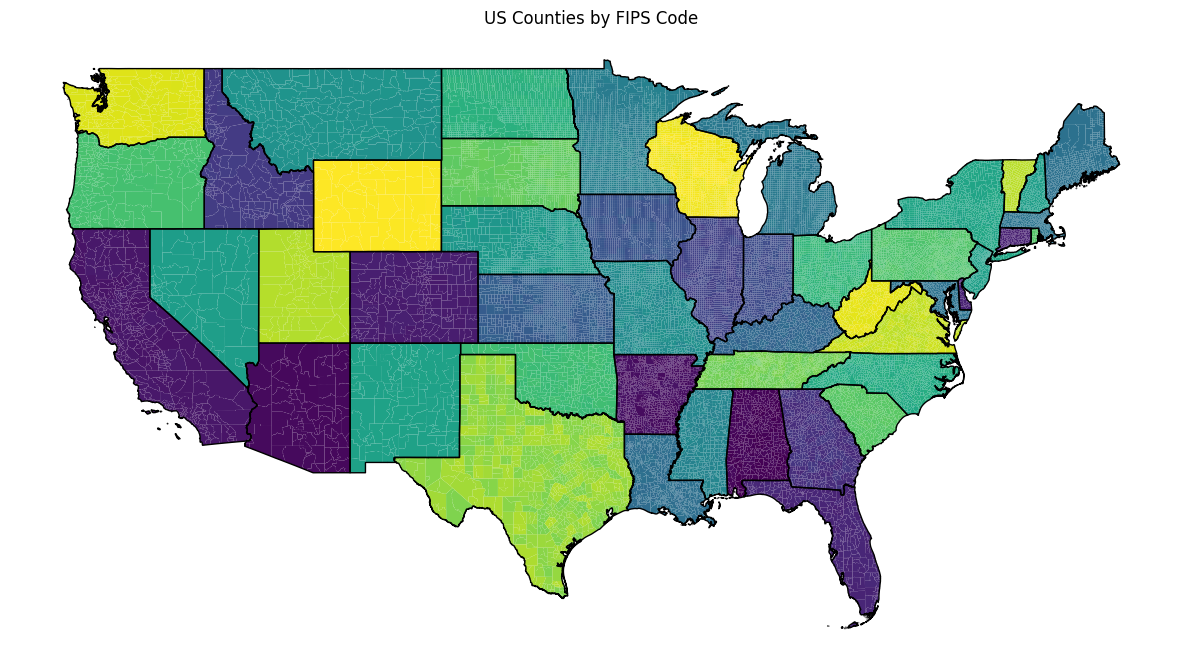

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load county shapefile
shapefile_path = '/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/shapfiles/shapfiles/cb_2023_us_cousub_500k.shp'
gdf_counties = gpd.read_file(shapefile_path)

# Drop any counties outside the contiguous 48 states
contiguous_states = {'01', '04', '05', '06', '08', '09', '10', '12', '13', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56'}
gdf_counties = gdf_counties[gdf_counties['STATEFP'].isin(contiguous_states)]

# Ensure a copy of the DataFrame is being modified
gdf_counties = gdf_counties.copy()
gdf_counties['FIPS'] = gdf_counties['STATEFP'] + gdf_counties['COUNTYFP']

# Dissolve counties to create state boundaries
gdf_states = gdf_counties.dissolve(by='STATEFP')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_counties.plot(column='FIPS', ax=ax, cmap='viridis', legend=False)
gdf_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Overlay state boundaries
ax.set_title('US Counties by FIPS Code')
ax.set_axis_off()
plt.show()


In [20]:
gdf_counties = gdf_counties.rename(columns={'FIPS': 'fips'})
gdf_counties['fips'] = gdf_counties['fips'].astype(int)

In [21]:
print(gdf_counties.columns)

Index(['STATEFP', 'COUNTYFP', 'COUSUBFP', 'COUSUBNS', 'GEOIDFQ', 'GEOID',
       'NAME', 'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'fips'],
      dtype='object')


In [22]:
gdf_counties = gdf_counties.merge(vote_summary_df[['fips', 'trump_vote_ratio']], on='fips', how='left')

A1 to A5

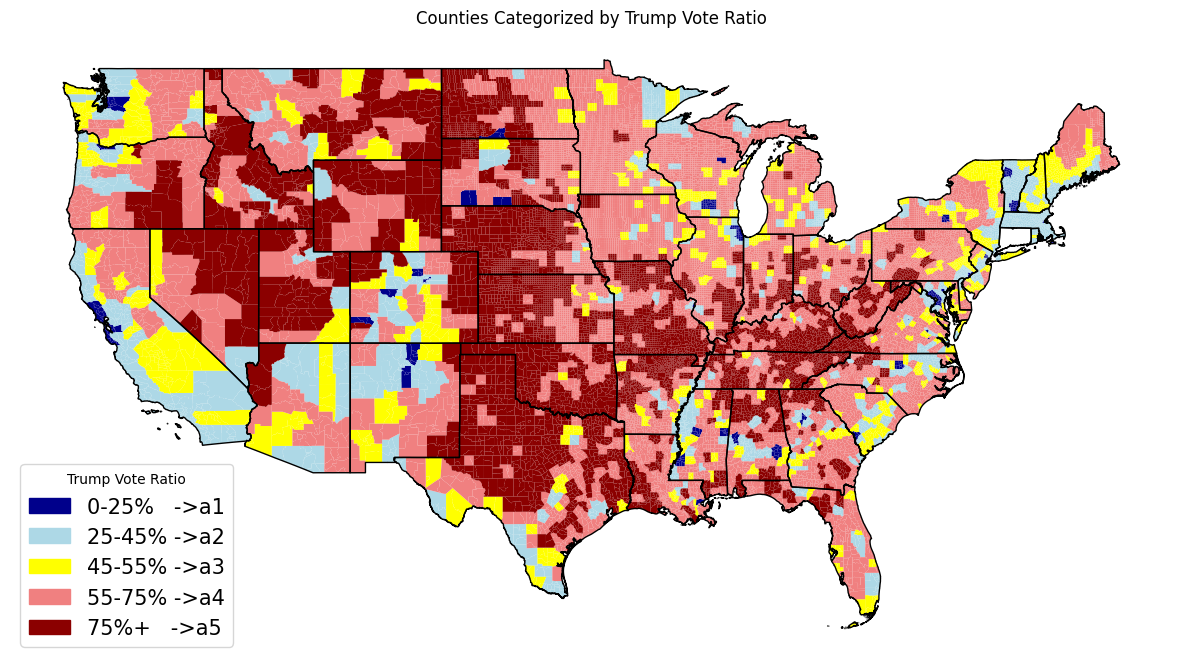

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf_counties is already merged with trumpd_votes_ratio from vdf
# Define categories based on trumpd_votes_ratio
gdf_counties['category'] = 'a1'  # Initialize with a5 (greater than 0.75)
gdf_counties.loc[gdf_counties['trump_vote_ratio'] >= 0.75, 'category'] = 'a5'
gdf_counties.loc[(gdf_counties['trump_vote_ratio'] >= 0.25) & (gdf_counties['trump_vote_ratio'] < 0.45), 'category'] = 'a2'
gdf_counties.loc[(gdf_counties['trump_vote_ratio'] >= 0.45) & (gdf_counties['trump_vote_ratio'] < 0.55), 'category'] = 'a3'
gdf_counties.loc[(gdf_counties['trump_vote_ratio'] >= 0.55) & (gdf_counties['trump_vote_ratio'] < 0.75), 'category'] = 'a4'

# Calculate counts for each category
category_counts = gdf_counties['category'].value_counts()

# Define colors for each category
colors = {
    'a1': 'darkblue',     # Extreme blue for less than 0.25
    'a2': 'lightblue',    # Less blue for 0.25-0.45
    'a3': '#FFFF00',      # Purple color for 0.45-0.55
    'a4': 'lightcoral',   # Light red for 0.55-0.75
    'a5': 'darkred'       # Extreme red for more than 0.75
}

# Plot counties with colors based on category
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

for category, color in colors.items():
    gdf_counties[gdf_counties['category'] == category].plot(ax=ax, color=color, edgecolor='none')

# Add legend
legend_labels = {
    'a1': '0-25%   ->a1',
    'a2': '25-45% ->a2',
    'a3': '45-55% ->a3',
    'a4': '55-75% ->a4',
    'a5': '75%+   ->a5'
}
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors.keys()]
ax.legend(handles, [legend_labels[label] for label in colors.keys()], loc='lower left', title='Trump Vote Ratio',fontsize=15)
gdf_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Overlay state boundaries
# Set plot title and display
ax.set_title('Counties Categorized by Trump Vote Ratio')
ax.set_axis_off()
plt.show()


Population Estimation of each county

In [24]:
cdf = pd.read_excel('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/filtered_PopulationEstimates.xlsx', skiprows=4)


new_df1 = cdf[~cdf['State'].str.endswith(('AK', 'HI'))].copy()

# Drop rows with missing values in 'State' column
new_df1 = new_df1.dropna(subset=['State'])
new_df1 = new_df1.rename(columns={'FIPStxt': 'fips'})
new_df2 = new_df1[['fips', 'POP_ESTIMATE_2021']]
new_df2.head()


fips  POP_ESTIMATE_2021
0     0        332031554.0
1  1000          5049846.0
2  1001            59210.0
3  1003           239361.0
4  1005            24539.0

In [25]:
combined_summary_df = pd.concat([a1_summary_df, a2_summary_df, a3_summary_df, a4_summary_df, a5_summary_df], ignore_index=True)

In [26]:
gdf_counties = gdf_counties.merge(combined_summary_df[['fips', 'cases', 'deaths']], on='fips', how='left')
gdf_counties.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS              GEOIDFQ       GEOID  \
0      04      023    92295  01934961  0600000US0402392295  0402392295   
1      06      097    92460  01935251  0600000US0609792460  0609792460   
2      09      160    16050  00213410  0600000US0916016050  0916016050   
3      12      103    93042  01935922  0600000US1210393042  1210393042   
4      16      049    91334  01936724  0600000US1604991334  1604991334   

             NAME            NAMELSAD STUSPS                       NAMELSADCO  \
0         Nogales         Nogales CCD     AZ                Santa Cruz County   
1        Petaluma        Petaluma CCD     CA                    Sonoma County   
2       Colebrook      Colebrook town     CT  Northwest Hills Planning Region   
3  St. Petersburg  St. Petersburg CCD     FL                  Pinellas County   
4     Grangeville     Grangeville CCD     ID                     Idaho County   

    STATE_NAME LSAD       ALAND     AWATER  \
0      Arizona   22  1762339489    2382710   
1   California   22   464973607    8198665   
2  Connecticut   43    81722366    3551365   
3      Florida   22   272910203  341516401   
4        Idaho   22  1610806612    5557016   

                                            geometry   fips  trump_vote_ratio  \
0  POLYGON ((-111.36692 31.52136, -111.33572 31.5...   4023          0.316650   
1  POLYGON ((-122.83423 38.29242, -122.83358 38.2...   6097          0.230474   
2  POLYGON ((-73.14313 41.98862, -73.12901 42.036...   9160               NaN   
3  MULTIPOLYGON (((-82.69547 27.66549, -82.69391 ...  12103          0.493482   
4  POLYGON ((-116.53961 45.74776, -116.53478 45.7...  16049          0.815039   

  category     cases  deaths  
0       a2    8500.0   185.0  
1       a1   37827.0   356.0  
2       a1       NaN     NaN  
3       a3  114284.0  1671.0  
4       a5    1648.0    18.0

In [27]:
gdf_counties = gdf_counties.merge(df_grouped[['fips', 'vaccinations']], on='fips', how='left')

In [28]:
gdf_counties.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS              GEOIDFQ       GEOID  \
0      04      023    92295  01934961  0600000US0402392295  0402392295   
1      06      097    92460  01935251  0600000US0609792460  0609792460   
2      09      160    16050  00213410  0600000US0916016050  0916016050   
3      12      103    93042  01935922  0600000US1210393042  1210393042   
4      16      049    91334  01936724  0600000US1604991334  1604991334   

             NAME            NAMELSAD STUSPS                       NAMELSADCO  \
0         Nogales         Nogales CCD     AZ                Santa Cruz County   
1        Petaluma        Petaluma CCD     CA                    Sonoma County   
2       Colebrook      Colebrook town     CT  Northwest Hills Planning Region   
3  St. Petersburg  St. Petersburg CCD     FL                  Pinellas County   
4     Grangeville     Grangeville CCD     ID                     Idaho County   

   ... LSAD       ALAND     AWATER  \
0  ...   22  1762339489    2382710   
1  ...   22   464973607    8198665   
2  ...   43    81722366    3551365   
3  ...   22   272910203  341516401   
4  ...   22  1610806612    5557016   

                                            geometry   fips  trump_vote_ratio  \
0  POLYGON ((-111.36692 31.52136, -111.33572 31.5...   4023          0.316650   
1  POLYGON ((-122.83423 38.29242, -122.83358 38.2...   6097          0.230474   
2  POLYGON ((-73.14313 41.98862, -73.12901 42.036...   9160               NaN   
3  MULTIPOLYGON (((-82.69547 27.66549, -82.69391 ...  12103          0.493482   
4  POLYGON ((-116.53961 45.74776, -116.53478 45.7...  16049          0.815039   

   category     cases  deaths  vaccinations  
0        a2    8500.0   185.0       31252.0  
1        a1   37827.0   356.0      282631.0  
2        a1       NaN     NaN           NaN  
3        a3  114284.0  1671.0      452025.0  
4        a5    1648.0    18.0        3670.0  

[5 rows x 21 columns]

In [29]:
gdf_counties = gdf_counties.merge(new_df2[['fips', 'POP_ESTIMATE_2021']], on='fips', how='left')

In [30]:
gdf_counties.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS              GEOIDFQ       GEOID  \
0      04      023    92295  01934961  0600000US0402392295  0402392295   
1      06      097    92460  01935251  0600000US0609792460  0609792460   
2      09      160    16050  00213410  0600000US0916016050  0916016050   
3      12      103    93042  01935922  0600000US1210393042  1210393042   
4      16      049    91334  01936724  0600000US1604991334  1604991334   

             NAME            NAMELSAD STUSPS                       NAMELSADCO  \
0         Nogales         Nogales CCD     AZ                Santa Cruz County   
1        Petaluma        Petaluma CCD     CA                    Sonoma County   
2       Colebrook      Colebrook town     CT  Northwest Hills Planning Region   
3  St. Petersburg  St. Petersburg CCD     FL                  Pinellas County   
4     Grangeville     Grangeville CCD     ID                     Idaho County   

   ...       ALAND     AWATER  \
0  ...  1762339489    2382710   
1  ...   464973607    8198665   
2  ...    81722366    3551365   
3  ...   272910203  341516401   
4  ...  1610806612    5557016   

                                            geometry   fips trump_vote_ratio  \
0  POLYGON ((-111.36692 31.52136, -111.33572 31.5...   4023         0.316650   
1  POLYGON ((-122.83423 38.29242, -122.83358 38.2...   6097         0.230474   
2  POLYGON ((-73.14313 41.98862, -73.12901 42.036...   9160              NaN   
3  MULTIPOLYGON (((-82.69547 27.66549, -82.69391 ...  12103         0.493482   
4  POLYGON ((-116.53961 45.74776, -116.53478 45.7...  16049         0.815039   

   category     cases  deaths  vaccinations  POP_ESTIMATE_2021  
0        a2    8500.0   185.0       31252.0            48034.0  
1        a1   37827.0   356.0      282631.0           484315.0  
2        a1       NaN     NaN           NaN           112974.0  
3        a3  114284.0  1671.0      452025.0           959046.0  
4        a5    1648.0    18.0        3670.0            17053.0  

[5 rows x 22 columns]

In [54]:
gdf_counties = gdf_counties.dropna(subset=['POP_ESTIMATE_2021', 'vaccinations', 'deaths', 'cases'])
#gdf_counties = gdf_counties.dropna(subset=['POP_ESTIMATE_2021', 'cases'])
gdf_counties = gdf_counties.dropna(subset=['POP_ESTIMATE_2021', 'deaths'])

In [55]:
gdf_counties['vaccinations']

0         31252.0
1        282631.0
3        452025.0
4          3670.0
5         48450.0
           ...   
35316     22854.0
35317      1420.0
35318      9828.0
35319     53411.0
35320     38978.0
Name: vaccinations, Length: 34251, dtype: float64

In [33]:
gdf_counties['case_rate_p']=(gdf_counties['cases']/gdf_counties['POP_ESTIMATE_2021'])*100
gdf_counties['deaths_rate_p']=(gdf_counties['deaths']/gdf_counties['POP_ESTIMATE_2021'])*100
gdf_counties['vac_rate_p']=(gdf_counties['vaccinations']/gdf_counties['POP_ESTIMATE_2021'])*100

In [51]:
gdf_counties['vaccinations']

0         31252.0
1        282631.0
3        452025.0
4          3670.0
5         48450.0
           ...   
35316     22854.0
35317      1420.0
35318      9828.0
35319     53411.0
35320     38978.0
Name: vaccinations, Length: 35147, dtype: float64

In [58]:
gdf_counties[gdf_counties['vac_rate_p']>100]
gdf_counties = gdf_counties[gdf_counties['vac_rate_p'] <= 100]

In [59]:
gdf_counties[['fips','vac_rate_p']].sort_values(by='vac_rate_p',ascending=False)

fips  vac_rate_p
16199  35031   82.964020
2398   35031   82.964020
6458   35031   82.964020
2185   35031   82.964020
10877  35031   82.964020
...      ...         ...
12859  51680    0.650926
18466  51570    0.598309
19185  51640    0.555639
17655  51690    0.206657
10980  51590    0.120351

[34249 rows x 2 columns]

# Final vac

<ipython-input-60-aa48b2ecc615>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


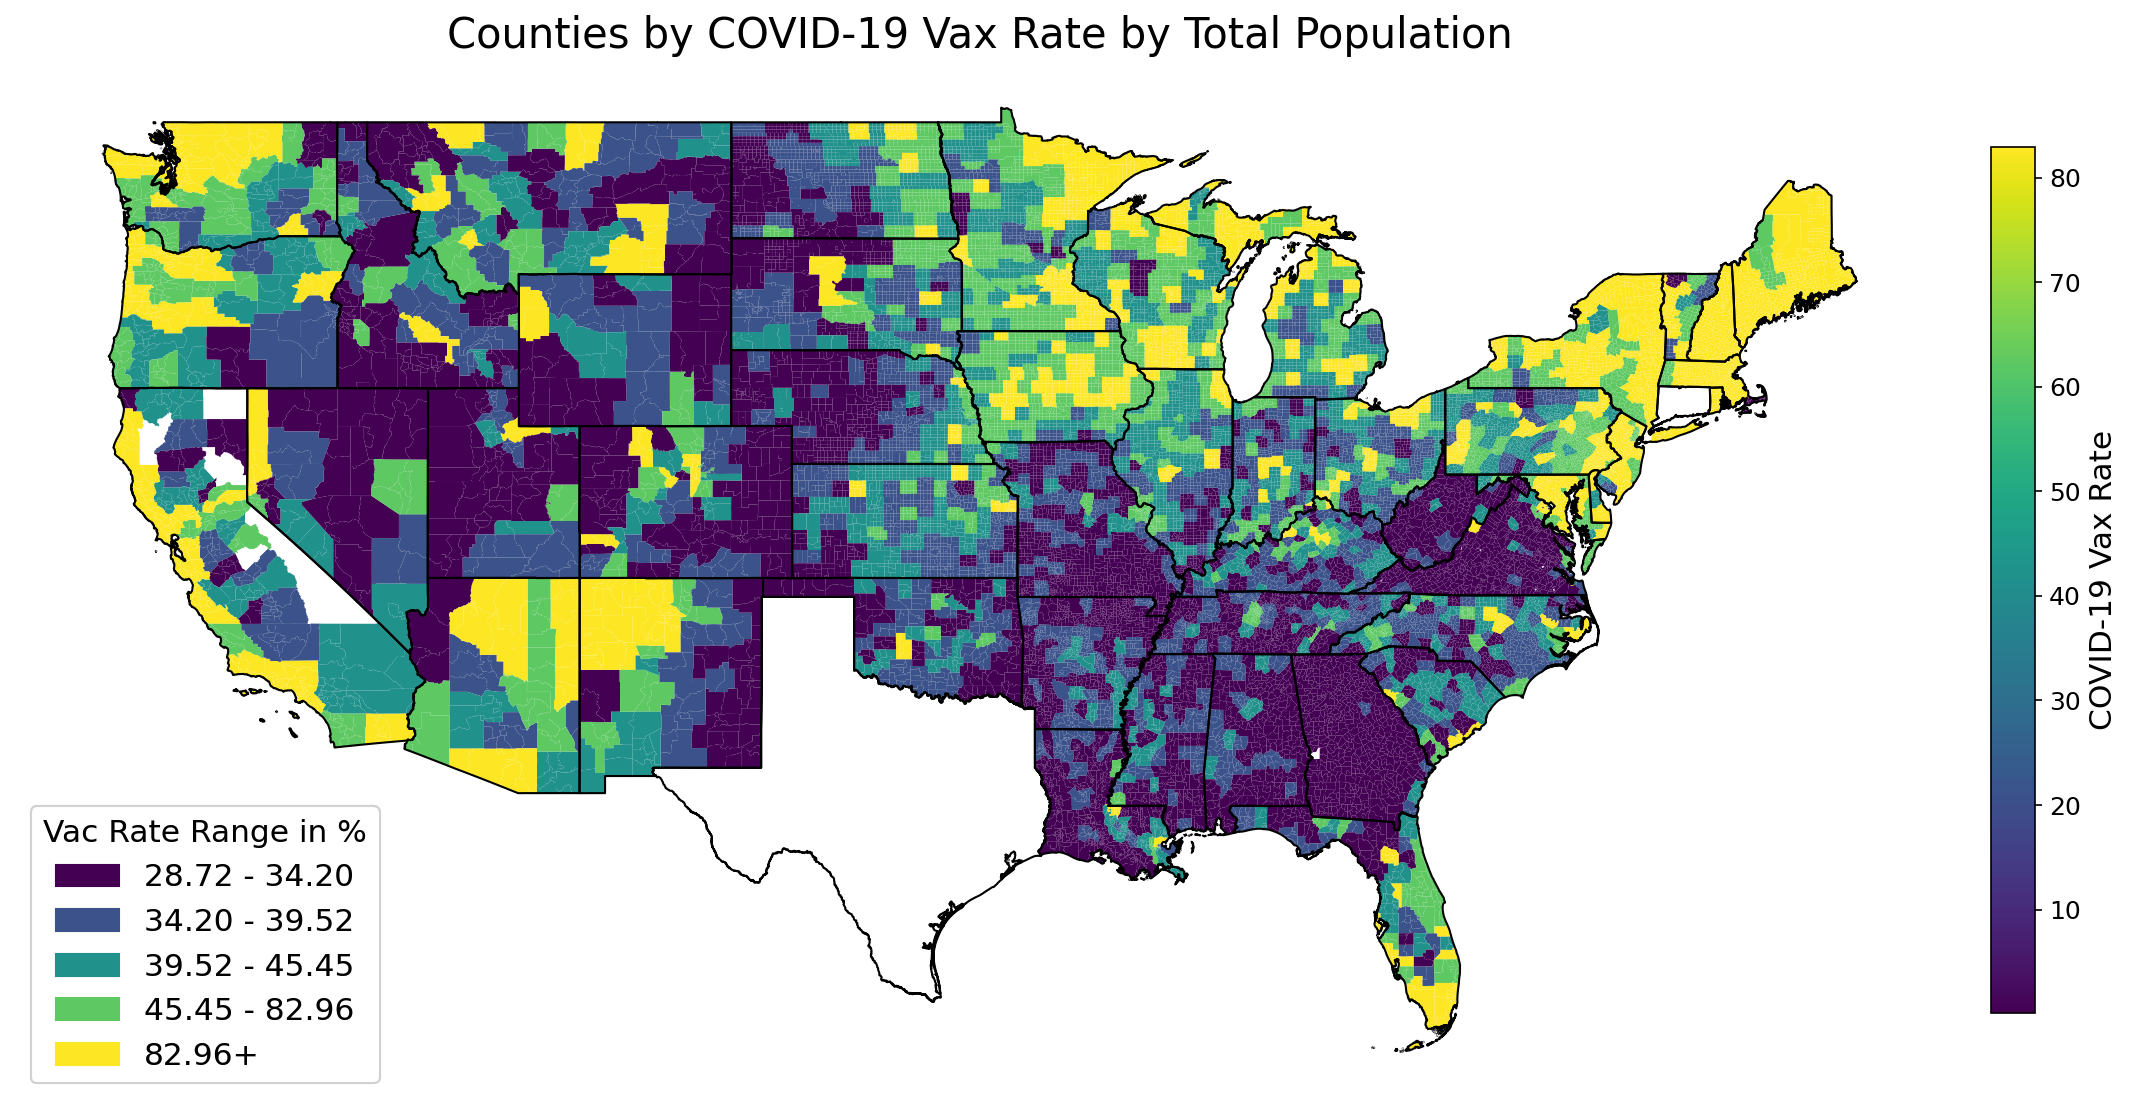

In [60]:
import mapclassify as mc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

# Assuming gdf_counties and gdf_states are already defined and loaded

# Classify vac_rate_p into 5 quantiles
quantiles = mc.Quantiles(gdf_counties['vac_rate_p'], k=5)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=150)

# Plot counties with vac_rate_p and color by quantiles
gdf_counties.plot(column='vac_rate_p', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='none', legend=False, scheme='Quantiles', classification_kwds={'k': 5})

# Overlay state boundaries
gdf_states.boundary.plot(ax=ax, linewidth=1, color='black')

# Set the title and remove the axes
ax.set_title('Counties by COVID-19 Vax Rate by Total Population', fontdict={'fontsize': 20, 'fontweight': 3})
ax.set_axis_off()

# Create custom legend for range and percentages on the left side
cmap = plt.cm.get_cmap('viridis', 5)
colors = [cmap(i) for i in range(cmap.N)]
labels = [f'{quantiles.bins[i]:.2f} - {quantiles.bins[i+1]:.2f}' if i < len(quantiles.bins) - 1 else f'{quantiles.bins[i]:.2f}+' for i in range(len(quantiles.bins))]

# Create a patch for each color and label
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

# Place the legend on the left side
legend_left = plt.legend(handles=patches, title='Vac Rate Range in %', loc='lower left', fontsize=15, title_fontsize=15)
ax.add_artist(legend_left)

# Create a simple color display legend on the right side
cmap_display = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf_counties['vac_rate_p'].min(), vmax=gdf_counties['vac_rate_p'].max()))
cmap_display.set_array([])  # necessary for the color bar to show up
cbar = fig.colorbar(cmap_display, ax=ax, orientation='vertical', pad=0.02,shrink=0.5)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('COVID-19 Vax Rate', fontsize=15)

plt.show()


<ipython-input-48-3fd06bb17f7c>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


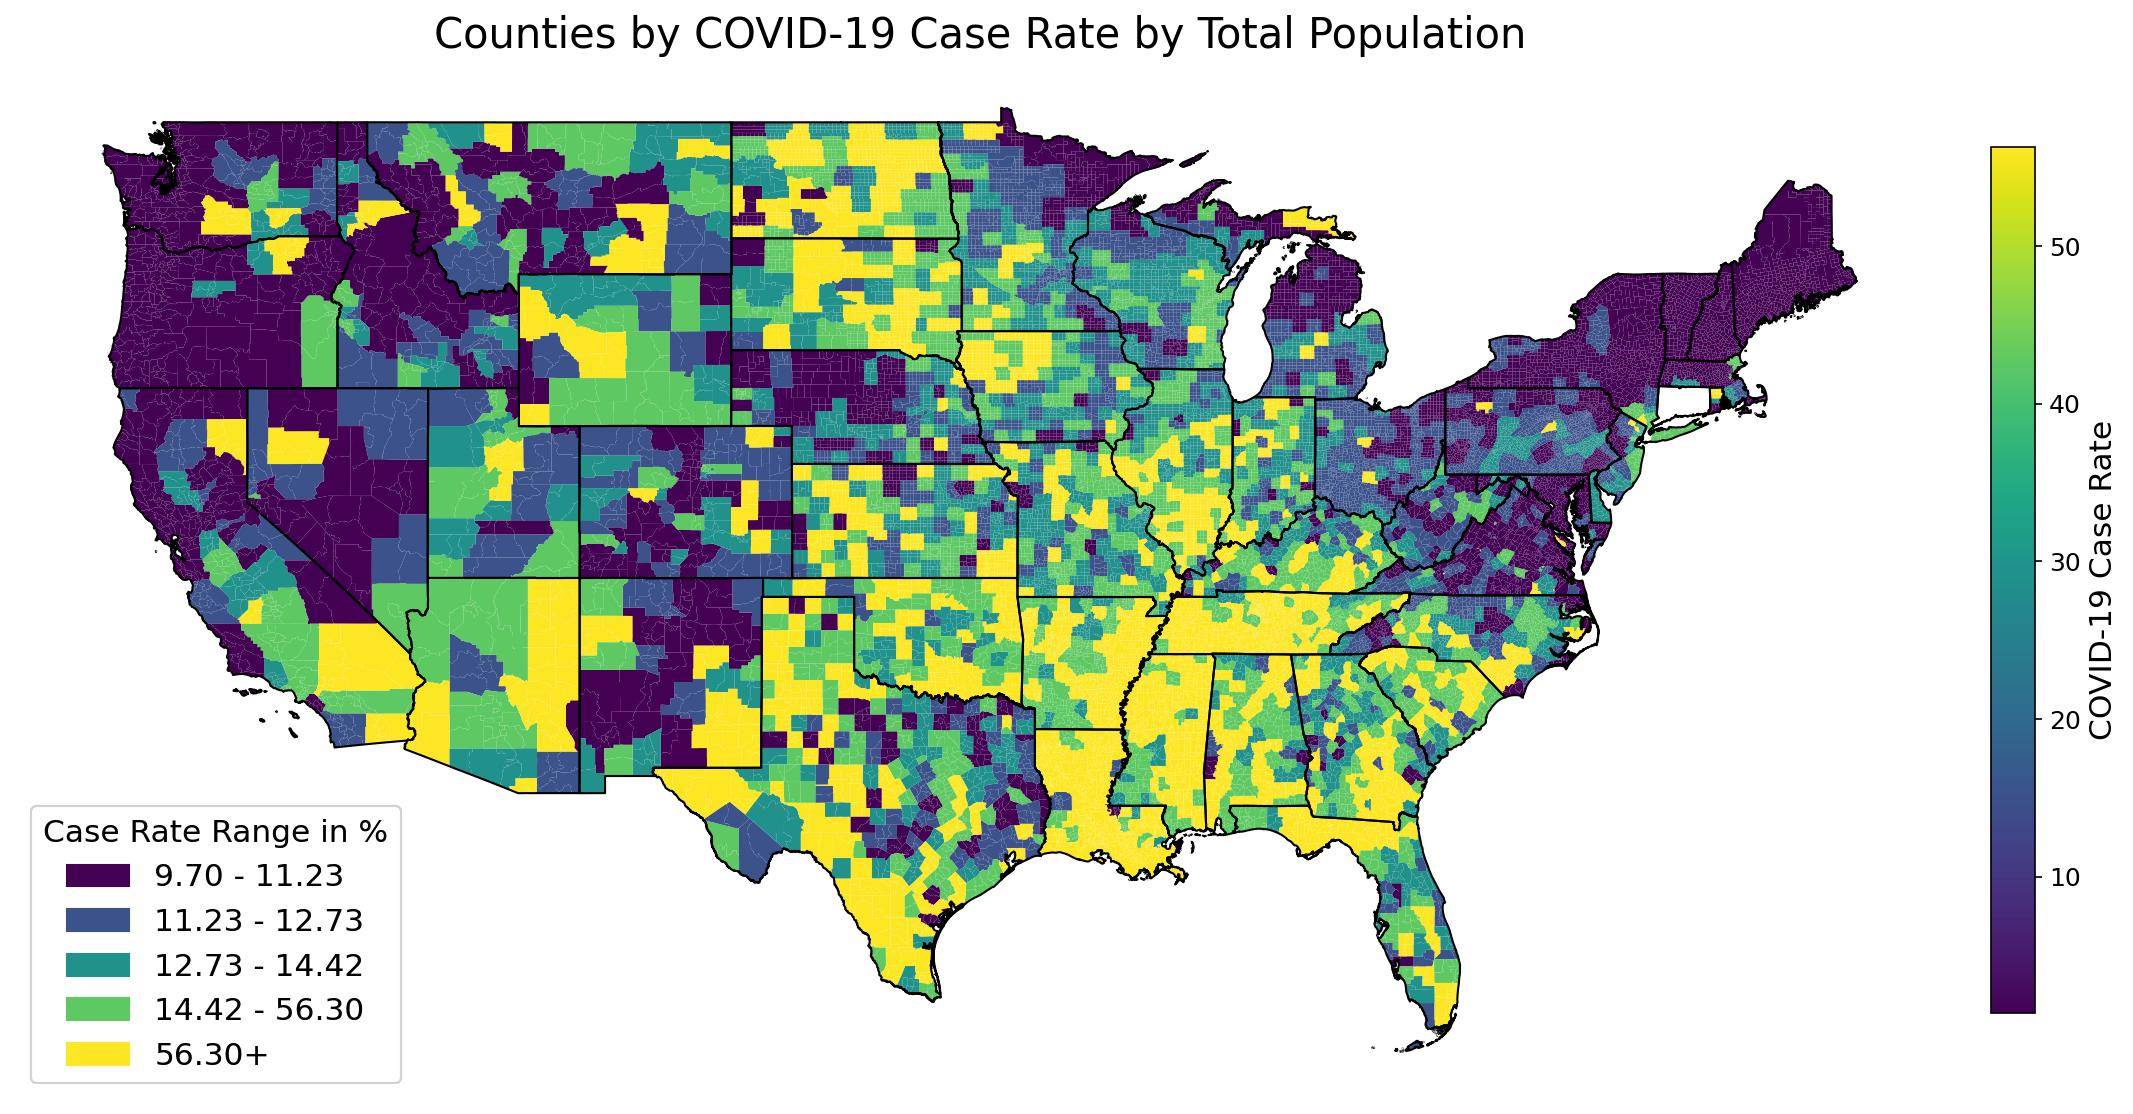

In [48]:
import mapclassify as mc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

# Assuming gdf_counties and gdf_states are already defined and loaded

# Classify vac_rate_p into 5 quantiles
quantiles = mc.Quantiles(gdf_counties['case_rate_p'], k=5)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=150)

# Plot counties with vac_rate_p and color by quantiles
gdf_counties.plot(column='case_rate_p', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='none', legend=False, scheme='Quantiles', classification_kwds={'k': 5})

# Overlay state boundaries
gdf_states.boundary.plot(ax=ax, linewidth=1, color='black')

# Set the title and remove the axes
ax.set_title('Counties by COVID-19 Case Rate by Total Population', fontdict={'fontsize': 20, 'fontweight': 3})
ax.set_axis_off()

# Create custom legend for range and percentages on the left side
cmap = plt.cm.get_cmap('viridis', 5)
colors = [cmap(i) for i in range(cmap.N)]
labels = [f'{quantiles.bins[i]:.2f} - {quantiles.bins[i+1]:.2f}' if i < len(quantiles.bins) - 1 else f'{quantiles.bins[i]:.2f}+' for i in range(len(quantiles.bins))]

# Create a patch for each color and label
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

# Place the legend on the left side
legend_left = plt.legend(handles=patches, title='Case Rate Range in %', loc='lower left', fontsize=15, title_fontsize=15)
ax.add_artist(legend_left)

# Create a simple color display legend on the right side
cmap_display = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf_counties['case_rate_p'].min(), vmax=gdf_counties['case_rate_p'].max()))
cmap_display.set_array([])  # necessary for the color bar to show up
cbar = fig.colorbar(cmap_display, ax=ax, orientation='vertical', pad=0.02,shrink=0.5)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('COVID-19 Case Rate', fontsize=15)

plt.show()


<ipython-input-49-43e9437b9c2f>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


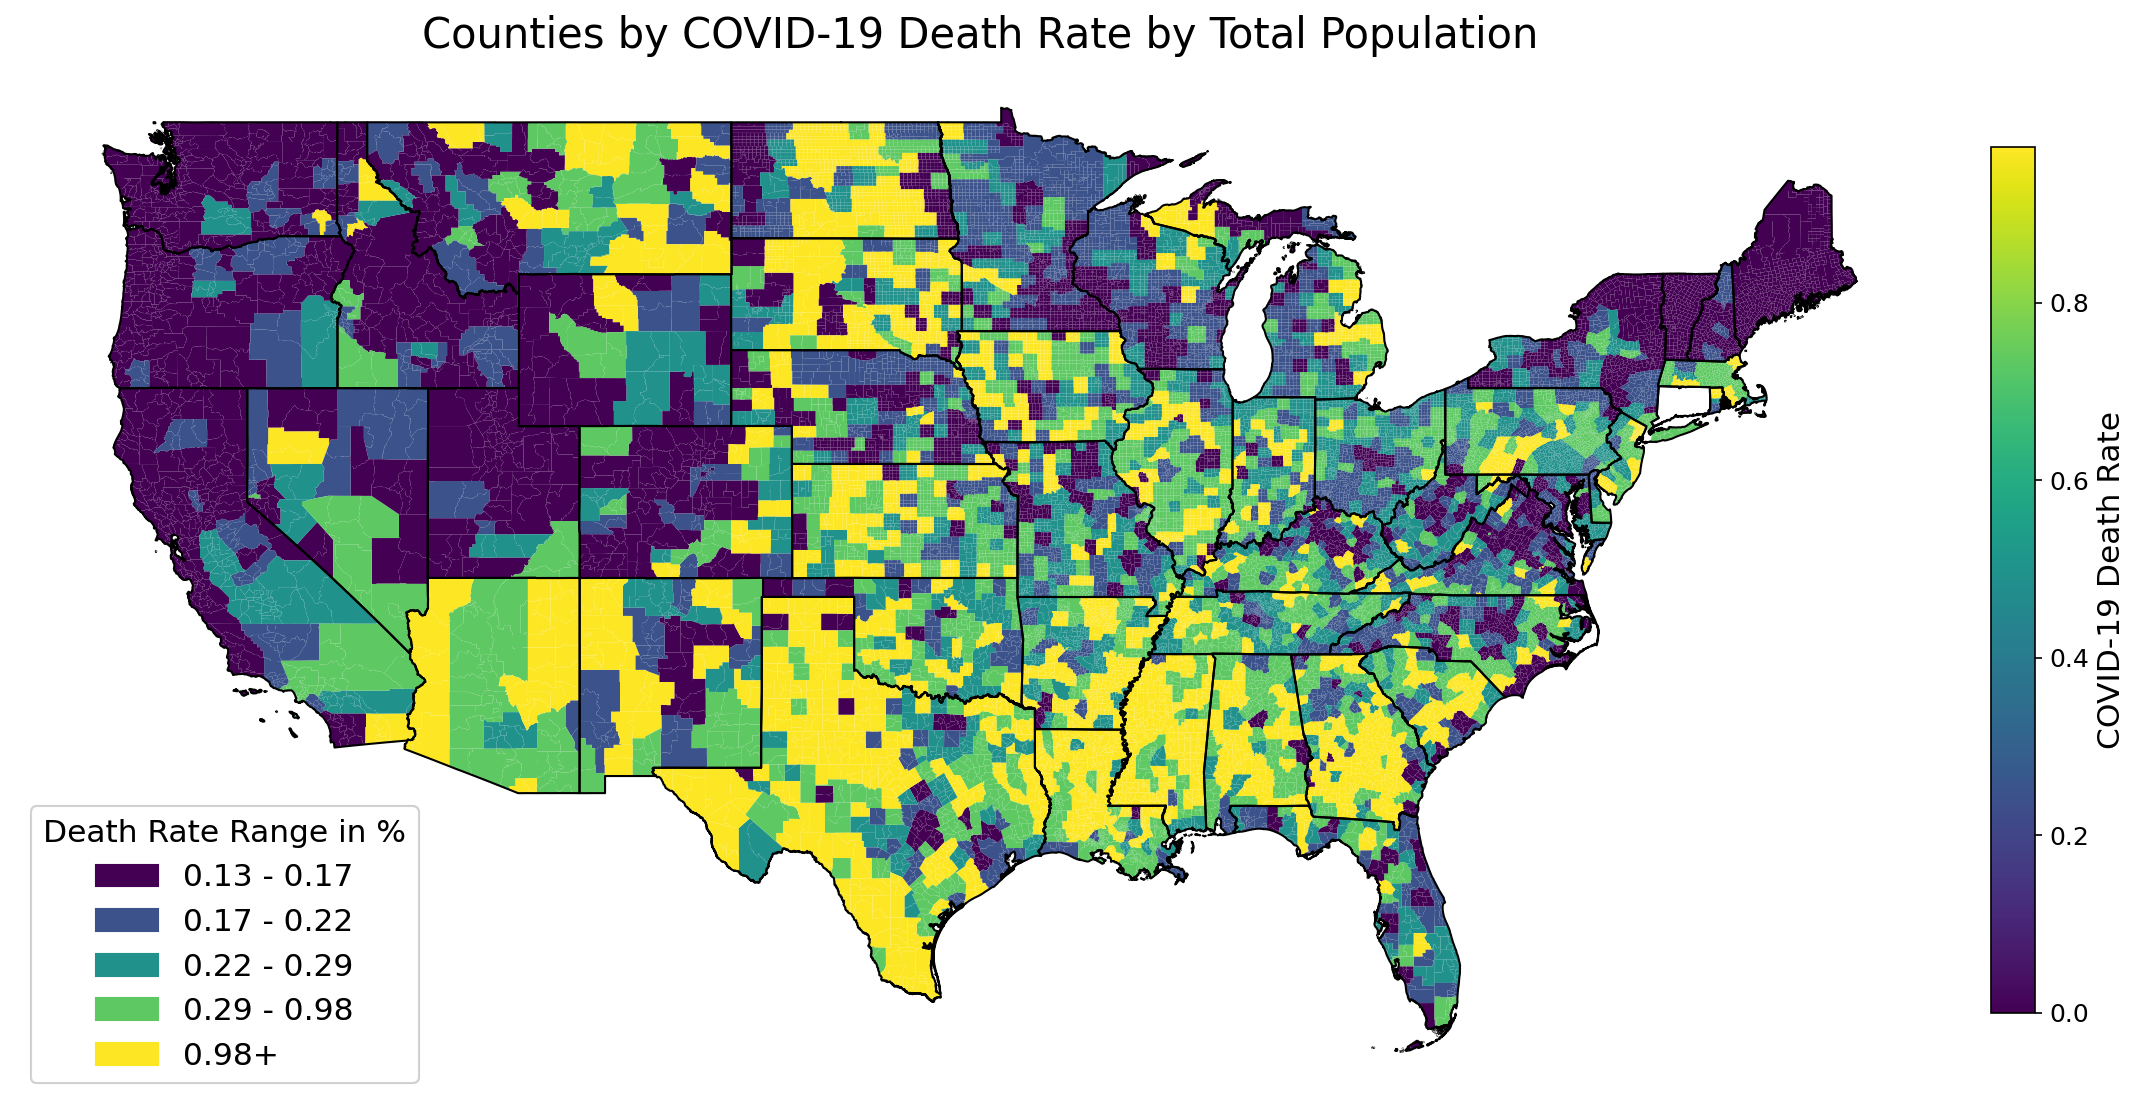

In [49]:
import mapclassify as mc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd



# Classify vac_rate_p into 5 quantiles
quantiles = mc.Quantiles(gdf_counties['deaths_rate_p'], k=5)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=150)

# Plot counties with vac_rate_p and color by quantiles
gdf_counties.plot(column='deaths_rate_p', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='none', legend=False, scheme='Quantiles', classification_kwds={'k': 5})

# Overlay state boundaries
gdf_states.boundary.plot(ax=ax, linewidth=1, color='black')

# Set the title and remove the axes
ax.set_title('Counties by COVID-19 Death Rate by Total Population', fontdict={'fontsize': 20, 'fontweight': 3})
ax.set_axis_off()

# Create custom legend for range and percentages on the left side
cmap = plt.cm.get_cmap('viridis', 5)
colors = [cmap(i) for i in range(cmap.N)]
labels = [f'{quantiles.bins[i]:.2f} - {quantiles.bins[i+1]:.2f}' if i < len(quantiles.bins) - 1 else f'{quantiles.bins[i]:.2f}+' for i in range(len(quantiles.bins))]

# Create a patch for each color and label
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

# Place the legend on the left side
legend_left = plt.legend(handles=patches, title='Death Rate Range in %', loc='lower left', fontsize=15, title_fontsize=15)
ax.add_artist(legend_left)

# Create a simple color display legend on the right side
cmap_display = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=gdf_counties['deaths_rate_p'].min(), vmax=gdf_counties['deaths_rate_p'].max()))
cmap_display.set_array([])  # necessary for the color bar to show up
cbar = fig.colorbar(cmap_display, ax=ax, orientation='vertical', pad=0.02,shrink=0.5)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('COVID-19 Death Rate', fontsize=15)

plt.show()


#final vac